**Code created on August, 2020 by, N. I. Md. Ashafuddula, BSc (RUET), MSc (DUET)**

#NLP Basics
https://www.analyticsvidhya.com/blog/2021/07/getting-started-with-natural-language-processing-using-python/

In [ ]:
from google.colab import drive
#drive.mount('/content/drive');

#Hierarchy of Text
Text is a collection of meaningful sentences. Texts are represented in Python in the form lists

In [ ]:
import nltk
from nltk import *
sent = "India is a republic nation. We are proud Indians"
print(len(sent)) #Prints the number of characters
print(sent[0:5]) #Prints 'India'
print(sent[11:19]) #Prints 'republic'

48
India
republic


#Tokens

A meaningful unit of text is a token. Words are usually considered tokens in NLP

In [ ]:
import nltk
nltk.download('punkt')

print(nltk.word_tokenize(sent)) 
#Prints list of words ['India', 'is', 'a', 'republic', 'nation', '.', 'We', 'are', 'proud', 'Indians']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['India', 'is', 'a', 'republic', 'nation', '.', 'We', 'are', 'proud', 'Indians']


#Vocabulary

The vocabulary of a text is the set of all unique tokens used in it

In [ ]:
tokens = nltk.word_tokenize(sent)
vocab = sorted(set(tokens))
print(vocab) #Prints ['.', 'India', 'Indians', 'We', 'a', 'are', 'country', 'is', 'proud', 'republic']

['.', 'India', 'Indians', 'We', 'a', 'are', 'is', 'nation', 'proud', 'republic']


#Punctuation
Punctuation refers to symbols used to separate sentences and their elements and to clarify meaning.

In [ ]:
from string import punctuation

vocab_wo_punct=[]

for i in vocab:
    if i not in punctuation:
        vocab_wo_punct.append(i)
print(vocab_wo_punct) #Prints ['India', 'Indians', 'We', 'a', 'are', 'country', 'is', 'proud', 'republic']

['India', 'Indians', 'We', 'a', 'are', 'is', 'nation', 'proud', 'republic']


#Part of Speech
Part of speech(POS) refers to the category to which a word is assigned based on its function. You may recall that the **English language has 8 parts of speech – noun, verb, adjective, adverb, pronoun, determiner, preposition, conjunction, and interjection.**

Different POS taggers are available that classify words into POS. A po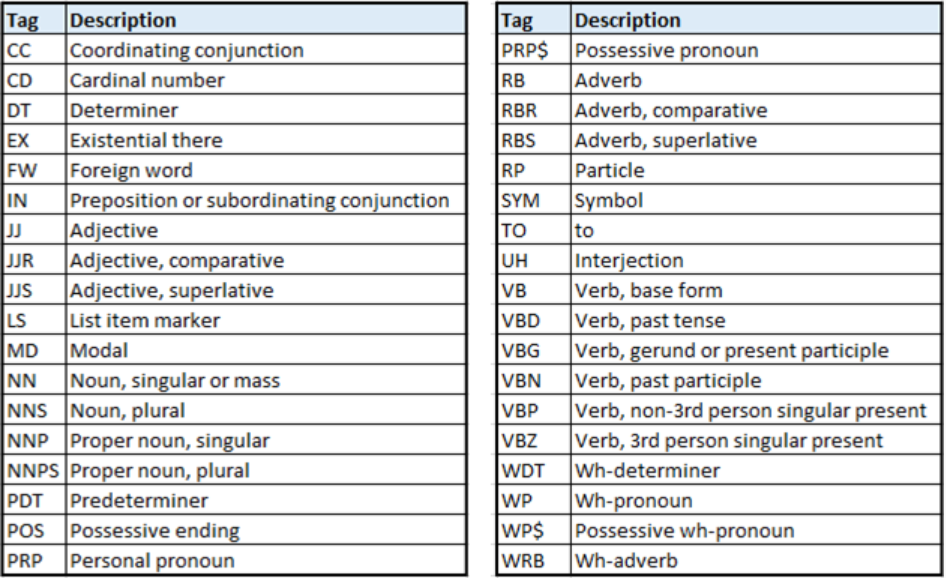pular one is the Penn treebank, which has the following parts of speech.

In [ ]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')

pos_list = pos_tag(vocab_wo_punct)
print(pos_list)
""" Prints [('India', 'NNP'), ('Indians', 'NNPS'), ('We', 'PRP'), ('a', 'DT'), 
            ('are', 'VBP'), ('country', 'NN'), ('is', 'VBZ'), ('proud', 'JJ'), 
            ('republic', 'JJ'), ('India', 'NNP')] """

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('India', 'NNP'), ('Indians', 'NNPS'), ('We', 'PRP'), ('a', 'DT'), ('are', 'VBP'), ('is', 'VBZ'), ('nation', 'NN'), ('proud', 'JJ'), ('republic', 'NN')]


" Prints [('India', 'NNP'), ('Indians', 'NNPS'), ('We', 'PRP'), ('a', 'DT'), \n            ('are', 'VBP'), ('country', 'NN'), ('is', 'VBZ'), ('proud', 'JJ'), \n            ('republic', 'JJ'), ('India', 'NNP')] "

#Root of a word – Stemming

Stemming is a technique used to find the root form of a word. In the root form, a word is devoid of any affixes (suffixes and prefixes)

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemObj = SnowballStemmer("english")
stemObj.stem("Studying") #Prints 'studi'

stemmed_vocab=[]
stemObj = SnowballStemmer("english")
for i in vocab_wo_punct:
    stemmed_vocab.append(stemObj.stem(i))
print(stemmed_vocab) #Prints ['india', 'indian', 'we', 'a', 'are', 'countri', 'is', 'proud', 'republ']

['india', 'indian', 'we', 'a', 'are', 'is', 'nation', 'proud', 'republ']


#Base of a word – Lemmatization

Lemmatization removes inflection and reduces the word to its base form

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmaObj =  WordNetLemmatizer()
lemmaObj.lemmatize("went",pos='v')  #Prints 'go'

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'go'

#Distributions and n-grams
Stop words

Stop words are typically the most commonly occurring words in text like ‘the’, ‘and’, ‘is’, etc. NLTK provides a pre-defined set of stopwords for English, as shown

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

wo_stop_words = []
stop_words_set = set(stopwords.words("english"))
for i in vocab_wo_punct:
    if i not in stop_words_set:
        wo_stop_words.append(i)
print(wo_stop_words) #Prints ['India', 'Indians', 'We', 'country', 'proud', 'republic']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['India', 'Indians', 'We', 'nation', 'proud', 'republic']


#Frequency Distribution

Frequency distribution helps understand which words are commonly used and which are not. These can help refine stop words in a given text.

<FreqDist with 21 samples and 34 outcomes>


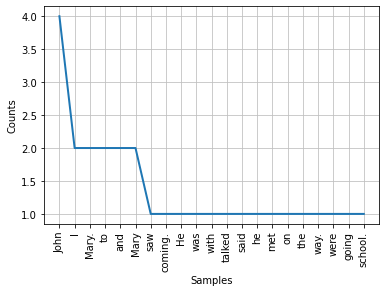

In [ ]:
text="I saw John coming. He was with Mary. I talked to John and Mary. John said he met Mary on the way. John and Mary were going to school."
print(nltk.FreqDist(nltk.word_tokenize(text)))
#Prints FreqDist({'.': 5, 'Mary': 4, 'John': 4, 'I': 2, 'to': 2, 'and': 2, 'the': 1, 'was': 1, 'were': 1, 'school': 1, ...})
nltk.FreqDist(text.split()).plot()

#Conditional Frequency Distribution
Conditional Frequency Distributions can help in identifying differences in the usage of words in different texts. For example, commonly used words in books/articles on the “romance” genre could be different from words used in books/articles of the “news” genre. An example with nltk library to get the conditional frequency distribution of words.

In [ ]:
from nltk.corpus import brown
nltk.download('brown')
from nltk import FreqDist

news_text = brown.words(categories='news')
fdist = FreqDist([w.lower() for w in news_text])
print(brown.categories())

cfd = nltk.ConditionalFreqDist(
          (a, b)
          for a in brown.categories()
          for b in brown.words(categories='news'))
genres_list = ['romance','news','science_fiction', 'humor','religion','hobbies']
modals_list = ['may','could', 'can', 'must', 'will', 'might']
cfd.tabulate(conditions=genres_list, samples=modals_list)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
                  may could   can  must  will might 
        romance    66    86    93    50   389    38 
           news    66    86    93    50   389    38 
science_fiction    66    86    93    50   389    38 
          humor    66    86    93    50   389    38 
       religion    66    86    93    50   389    38 
        hobbies    66    86    93    50   389    38 


#N-grams
N-gram is a contiguous sequence of n items from a given sample of text or speech. NLTK provides methods to extract n-grams from text

In [ ]:
from nltk import ngrams
#use 2 for bigrams
bigrams = ngrams(vocab_wo_punct,2)
print(list(bigrams))
#Prints [('India', 'Indians'), ('Indians', 'We'), ('We', 'a'), ('a', 'are'), ('are', 'country'),  ('country', 'is'), ('is', 'proud'), ('proud', 'republic')] 
#use 3 for trigrams
trigrams = ngrams(vocab_wo_punct,3)
print(list(trigrams)) 
[('India', 'Indians', 'We'), ('Indians', 'We', 'a'), ('We', 'a', 'are'), ('a', 'are', 'country'), ('are', 'country', 'is'), ('country', 'is', 'proud'), ('is', 'proud', 'republic')]

[('India', 'Indians'), ('Indians', 'We'), ('We', 'a'), ('a', 'are'), ('are', 'is'), ('is', 'nation'), ('nation', 'proud'), ('proud', 'republic')]
[('India', 'Indians', 'We'), ('Indians', 'We', 'a'), ('We', 'a', 'are'), ('a', 'are', 'is'), ('are', 'is', 'nation'), ('is', 'nation', 'proud'), ('nation', 'proud', 'republic')]


[('India', 'Indians', 'We'),
 ('Indians', 'We', 'a'),
 ('We', 'a', 'are'),
 ('a', 'are', 'country'),
 ('are', 'country', 'is'),
 ('country', 'is', 'proud'),
 ('is', 'proud', 'republic')]

#Build Wiki corpus
https://www.kdnuggets.com/2017/11/building-wikipedia-text-corpus-nlp.html

**Install gensim**

In order to easily build a text corpus void of the Wikipedia article markup, we will use gensim, a topic modeling library for Python. Specifically, the gensim.corpora.wikicorpus.WikiCorpus class is made just for this task:

Construct a corpus from a Wikipedia. A Wikipedia dump file is also required for this procedure, quite obviously. https://dumps.wikimedia.org/enwiki/latest/
The file I aquired and used for this task was enwiki-latest-pages-articles.xml.bz2.


In [ ]:
pip install gensim

In [ ]:
#/content/drive/MyDrive/Data/NLP datat/nlp_wikipedia_sample.txt

#Operations on Text
Let us now use a sample text file – Few paragraphs from the Wikipedia article on NLP and perform the different preprocessing operations.

In [ ]:
import nltk
import string
from nltk import word_tokenize
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
#read the file 
path = "/content/drive/MyDrive/Data/NLP datat/nlp_wikipedia_sample.txt"


#Note: use the correct path of the file depending on your environment
# Using readline()
file1 = open(path, 'r')
count = 0
 
while True:
    count += 1
 
    # Get next line from file
    line = file1.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    print("Line{}: {}".format(count, line.strip()))
 
file1.close()

Line1: GeeksforGeeks
